# 利用台大安寧病房124位病人的資料，探勘早照會與晚照會病人分別較常用的藥品有哪些?

### 第一步:載入需要的軟件(畫圖:matplotlib.pyplot、標準化資料:pandas、處理資料:numpy)，並概看days.csv的資料)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

day = pd.read_csv('days.csv')
day.head()

,Unnamed: 0,x
0,1,46.0
1,2,34.0
2,3,12.0
3,4,60.0
4,5,14.0


### 第二步:計算照會病人的平均時長，以利後續區分早照會與晚照會病人

In [2]:
sumday=0
test=0
patient_day=[]
for i,row in enumerate(open('days.csv')):
    if i != 0:
        try:
            sumday += int(row.split(',')[1])
            test+=1
            patient_day.append(int(row.split(',')[1]))
        except:
            sumday+=0
            test+=0
            patient_day.append('None')
average=sumday/test
print (average,patient_day)

30.243697478991596 [46, 34, 12, 60, 14, 31, 8, 'None', 34, 34, 20, 8, 10, 66, 4, 24, 21, 62, 38, 10, 19, 27, 14, 32, 16, 107, 27, 41, 49, 27, 12, 13, 15, 35, 37, 30, 14, 26, 82, 20, 0, 17, 16, 31, 1, 17, 14, 87, 53, 14, 25, 79, 25, 22, 14, 12, 19, 40, 2, 49, 44, 43, 43, 48, 35, 28, 60, 54, 24, 26, 6, 31, 18, 105, 36, 16, 21, 17, 22, 19, 3, 45, 14, 43, 16, 18, 61, 9, 17, 27, 12, 13, 128, 7, 19, 16, 10, 29, 38, 16, 14, 27, 19, 1, 8, 127, 15, 35, 10, 10, 'None', 'None', 'None', 'None', 16, 4, 22, 22, 210, 27, 25, 6, 17, 31]


### 第三步:概看dfall(1).csv檔

In [3]:
dfall = pd.read_csv('dfall (1).csv')
dfall.head()

,Unnamed: 0,.rownames,X1,X2,X3,X4,X5,X6,X7,X8,...,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124
0,1,MICU,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2,ER,1,1,1,0,1,1,0,0,...,1,1,1,1,1,0,1,1,1,0
2,3,IAI,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,CRRT,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,PSA,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 第四步:整理dfall(1).csv檔案，以利後續統計藥品名，以及根據早照會、晚照會的病人，區別藥物!

In [4]:
dfalllist=[]
for i,row in enumerate(open('dfall (1).csv')):
    dfalllist.append(row.split(','))
for i in dfalllist:
    del i[0]

#### 將藥物名稱紀錄在drug list中

In [5]:
drug=[]
for i,j in enumerate(dfalllist):
    if i != 0:
        drug.append(j[0])

#### 將病人id紀錄在patient_index list中

In [6]:
import copy
patient_index=copy.copy(dfalllist[0])

#### 建立patient dictionary 以病人 id為key，病人天數為value。

In [7]:
patient=dict()
for i in range(len(patient_index)):
    if i != 0:
        patient[patient_index[i]]=[patient_day[i-1]]

#### 根據病人的id，在patient dictionary中，新增病人是否有使用該藥物的資料，若有使用該藥物，則在value中新增該藥物的名稱，以利後續根據早照會、晚照會，區分藥品。

In [8]:
for drugid,row in enumerate(open('dfall (1).csv')):
    if drugid != 0:
        for patientid,k in enumerate(row):
            try:
                if int(k) == 1:
                    patient[patient_index[patientid]].append(row.split(',')[1])
            except:
                pass

### 第五步:區分早照會與晚照會的病人

In [9]:
#區分早照會與晚照會
early_patient=[]
late_patient=[]
for i in patient:
    if patient[i][0] != 'None':
        if int(patient[i][0]) <= average:
            early_patient.append(i)
        else:
             late_patient.append(i)
    else:
        pass        
print('early:%s,late:%s' %(early_patient,late_patient))    

early:['"X3"', '"X5"', '"X7"', '"X11"', '"X12"', '"X13"', '"X15"', '"X16"', '"X17"', '"X20"', '"X21"', '"X22"', '"X23"', '"X25"', '"X27"', '"X30"', '"X31"', '"X32"', '"X33"', '"X36"', '"X37"', '"X38"', '"X40"', '"X41"', '"X42"', '"X43"', '"X45"', '"X46"', '"X47"', '"X50"', '"X51"', '"X53"', '"X54"', '"X55"', '"X56"', '"X57"', '"X59"', '"X66"', '"X69"', '"X70"', '"X71"', '"X73"', '"X76"', '"X77"', '"X78"', '"X79"', '"X80"', '"X81"', '"X83"', '"X85"', '"X86"', '"X88"', '"X89"', '"X90"', '"X91"', '"X92"', '"X94"', '"X95"', '"X96"', '"X97"', '"X98"', '"X100"', '"X101"', '"X102"', '"X103"', '"X104"', '"X105"', '"X107"', '"X109"', '"X110"', '"X115"', '"X116"', '"X117"', '"X118"', '"X120"', '"X121"', '"X122"', '"X123"'],late:['"X1"', '"X2"', '"X4"', '"X6"', '"X9"', '"X10"', '"X14"', '"X18"', '"X19"', '"X24"', '"X26"', '"X28"', '"X29"', '"X34"', '"X35"', '"X39"', '"X44"', '"X48"', '"X49"', '"X52"', '"X58"', '"X60"', '"X61"', '"X62"', '"X63"', '"X64"', '"X65"', '"X67"', '"X68"', '"X72"', '"X74"

### 第六步:區分僅在早照會或是僅在晚照會才會使用的藥物，並分別記錄在earlydrug 和 lastdrug list中

In [10]:
#早期用藥
earlydrug=[]
for i in early_patient:
    for j,k in enumerate(patient[i]):
        if j != 0:
            if k in earlydrug:
                pass
            else:
                earlydrug.append(k)

In [11]:
#晚期用藥
latedrug=[]
for i in late_patient:
    for j,k in enumerate(patient[i]):
        if j != 0:
            if k in latedrug:
                pass
            else:
                latedrug.append(k)

In [12]:
distinct_drug=dict()
distinct_drug["early"]=[]
for k in earlydrug:
    if k in latedrug:
        pass
    else:
        distinct_drug["early"].append(k)

In [13]:
distinct_drug["late"]=[]
for k in latedrug:
    if k in earlydrug:
        pass
    else:
        distinct_drug["late"].append(k)

### 第七步:分別建立numberofpatientforearly 以及 numberofpatientforlast 兩個dictionary，將藥物作為key，value則為有幾位早/晚照會病患使用此藥物的病人數，並且由多到寡排序。

In [14]:
numberofpatientforearly=dict()
for i in distinct_drug["early"]:
    numberofpatientforearly[i]=0
    for k in patient:
        if i in patient[k]:
            numberofpatientforearly[i] +=1
kforearly=sorted(numberofpatientforearly.items(),key= lambda e: e[1] , reverse=True)
print(kforearly) 

[('"present"', 9), ('"RT"', 8), ('"record"', 8), ('"engorgement"', 6), ('"still"', 6), ('"CVA"', 5), ('"specimen"', 5), ('"aldactone"', 5), ('"spiriva"', 5), ('"matter"', 5), ('"cap"', 5), ('"progression"', 5), ('"vasopressor"', 5), ('"prominent"', 5), ('"enhancement"', 5), ('"correlated"', 5), ('"C1"', 5), ('"drowsy"', 5), ('"thalidomide"', 4), ('"adrenal"', 4), ('"anxiety"', 4), ('"bed"', 4), ('"periventricular"', 4), ('"sulci"', 4), ('"delirium"', 4), ('"common"', 4), ('"IAI"', 4), ('"LM"', 4), ('"nut"', 4), ('"tremor"', 4), ('"appearance"', 4), ('"allegra"', 4), ('"hoarseness"', 4), ('"psychiatric"', 4), ('"component"', 4), ('"deformity"', 4), ('"HLA"', 4), ('"titration"', 4), ('"use"', 4), ('"shadow"', 4), ('"infection"', 4), ('"COP"', 4), ('"COPD"', 4), ('"are"', 4), ('"enzymes"', 4), ('"fibrosis"', 4), ('"Kcal"', 4), ('"BiPAP"', 3), ('"bag"', 3), ('"defect"', 3), ('"dosage"', 3), ('"nonreactive"', 3), ('"odynophagia"', 3), ('"rhinorrhea"', 3), ('"ventricles"', 3), ('"four"', 3),

In [15]:
numberofpatientforlate=dict()
for i in distinct_drug["late"]:
    numberofpatientforlate[i]=0
    for k in patient:
        if i in patient[k]:
            numberofpatientforlate[i] +=1
kforlate=sorted(numberofpatientforlate.items(),key= lambda e: e[1] , reverse=True)

### 第八步:針對僅在早照會病患使用的藥物以及病人數資料，建立成dataframe的資料，方便探勘以及後續視覺化。

In [16]:
df = pd.DataFrame(kforearly,index=range(len(numberofpatientforearly)) )
df.head()

,0,1
0,"""present""",9
1,"""RT""",8
2,"""record""",8
3,"""engorgement""",6
4,"""still""",6


In [17]:
x=[]
y=[]
for k in kforearly:
    if k[1]>=6:
        x.append(k[0])
        y.append(k[1])

### 第九步:顯示僅在早照會病患中使用的前五大藥物，

<BarContainer object of 5 artists>

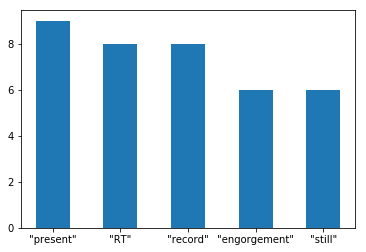

In [18]:
#早照會中前五大主要被使用的藥品
plt.bar(x,y,width=0.5)

### 第十步:重複第八步以及第九步的步驟，套用在晚照會的病人中

In [19]:
x2=[]
y2=[]
for k in kforlate:
    if k[1]>=5:
        x2.append(k[0])
        y2.append(k[1])

<BarContainer object of 5 artists>

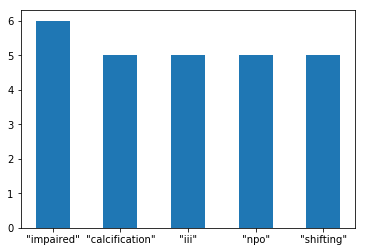

In [20]:
#晚照會中前五大主要被使用的藥品
plt.bar(x2,y2,width=0.5)